In [1]:
!pip install geopandas
!pip install contextily

     |████████████████████████████████| 1.0 MB 13.7 MB/s 
     |████████████████████████████████| 16.7 MB 357 kB/s 
     |████████████████████████████████| 6.3 MB 52.1 MB/s 
     |████████████████████████████████| 19.3 MB 1.1 MB/s 


In [2]:
import geopandas
import pandas as pd
import contextily

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
regioni = geopandas.read_file("/content/drive/MyDrive/Colab Notebooks/Limiti01012021_g/Reg01012021_g")
regioni.head()

COD_RIP  ...                                           geometry
0        1  ...  POLYGON ((457749.464 5145501.795, 458662.395 5...
1        1  ...  POLYGON ((390652.644 5091766.171, 390748.643 5...
2        1  ...  MULTIPOLYGON (((485536.366 4985444.605, 485366...
3        2  ...  POLYGON ((743267.749 5219765.793, 743387.812 5...
4        2  ...  POLYGON ((768123.960 5175397.497, 768135.210 5...

[5 rows x 6 columns]

In [6]:
province = geopandas.read_file("/content/drive/MyDrive/Colab Notebooks/Limiti01012021_g/ProvCM01012021_g")
province.head()

COD_RIP  ...                                           geometry
0        1  ...  POLYGON ((411015.006 5049970.983, 411266.039 5...
1        1  ...  POLYGON ((438328.612 5087208.215, 439028.888 5...
2        1  ...  POLYGON ((460929.542 5076320.298, 461165.259 5...
3        1  ...  MULTIPOLYGON (((378673.492 4958865.159, 378928...
4        1  ...  POLYGON ((425041.329 4997628.309, 424948.989 4...

[5 rows x 13 columns]

In [7]:
import matplotlib.pyplot as plt

#Dato il nome di una regione (inserito dall’utente), calcolare la dimensione media della superficie delle sue province. Visualizzare poi sulla mappa la regione e le province, facendo in modo che le province con una superfice inferiore alla media siano colorate di verde mentre le altre siano colorato di rosso. Visualizzare anche i nomi delle province. Controllare che il nome della regione sia presente nel dataset: in caso negativo dare un messaggio di errore.

inserisci una regione: Lombardia


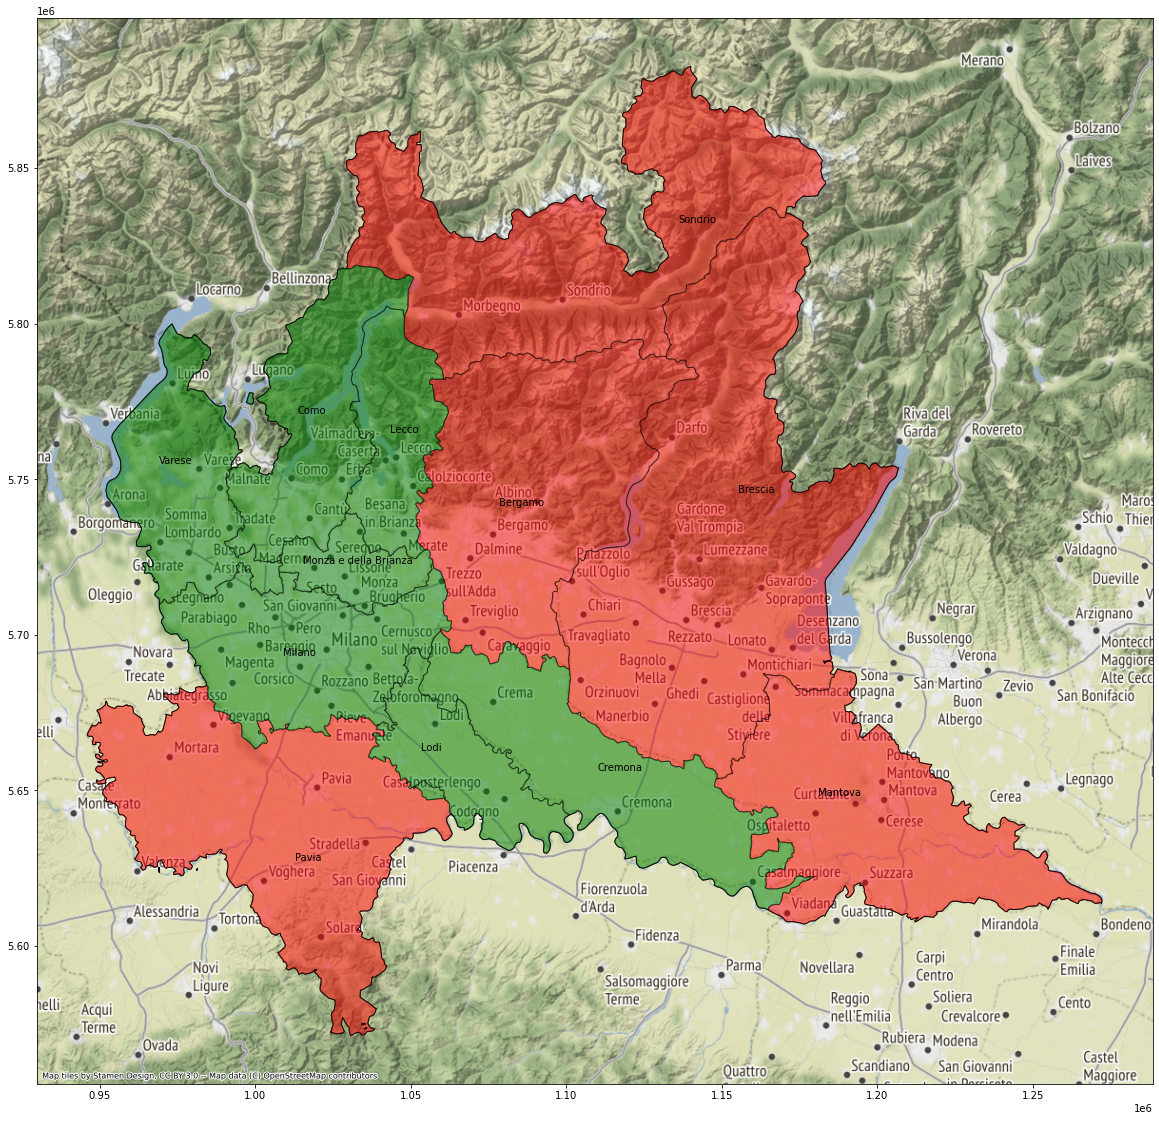

In [8]:
input_reg = input("inserisci una regione: ")
if input_reg in list(regioni.DEN_REG):
  regione = regioni[regioni.DEN_REG == input_reg]
  prov_reg = province[province.within(regione.geometry.squeeze())]
  media = prov_reg.Shape_Area.mean()
  prov_sup = prov_reg[prov_reg.Shape_Area >= media]
  prov_inf = prov_reg[prov_reg.Shape_Area < media]

  prov_reg3857 = prov_reg.to_crs(epsg = 3857)
  prov_reg3857["coords"] = prov_reg3857["geometry"].apply(lambda x: x.representative_point().coords[:])
  prov_reg3857["coords"] = [coords[0] for coords in prov_reg3857["coords"]]

  ax = regione.to_crs(epsg=3857).plot(figsize =(20,20), facecolor="none", edgecolor = "k")
  prov_sup.to_crs(epsg=3857).plot(ax=ax, facecolor="red", alpha = 0.5, edgecolor = "k")
  prov_inf.to_crs(epsg=3857).plot(ax=ax, facecolor="green", alpha = 0.5, edgecolor = "k")
  contextily.add_basemap(ax, crs=3857)

  for idx, row in prov_reg3857.iterrows():
    plt.annotate(s=row["DEN_UTS"], xy=row["coords"], horizontalalignment="center", color="k")  


else:
  print("non esiste")

#Cercare la provincia che ha la superficie maggiore. Visualizzare poi su una mappa la provincia con la superficie maggiore e tutte le province con cui confina. Colorare di verde la provincia più estesa e di giallo le province confinanti.

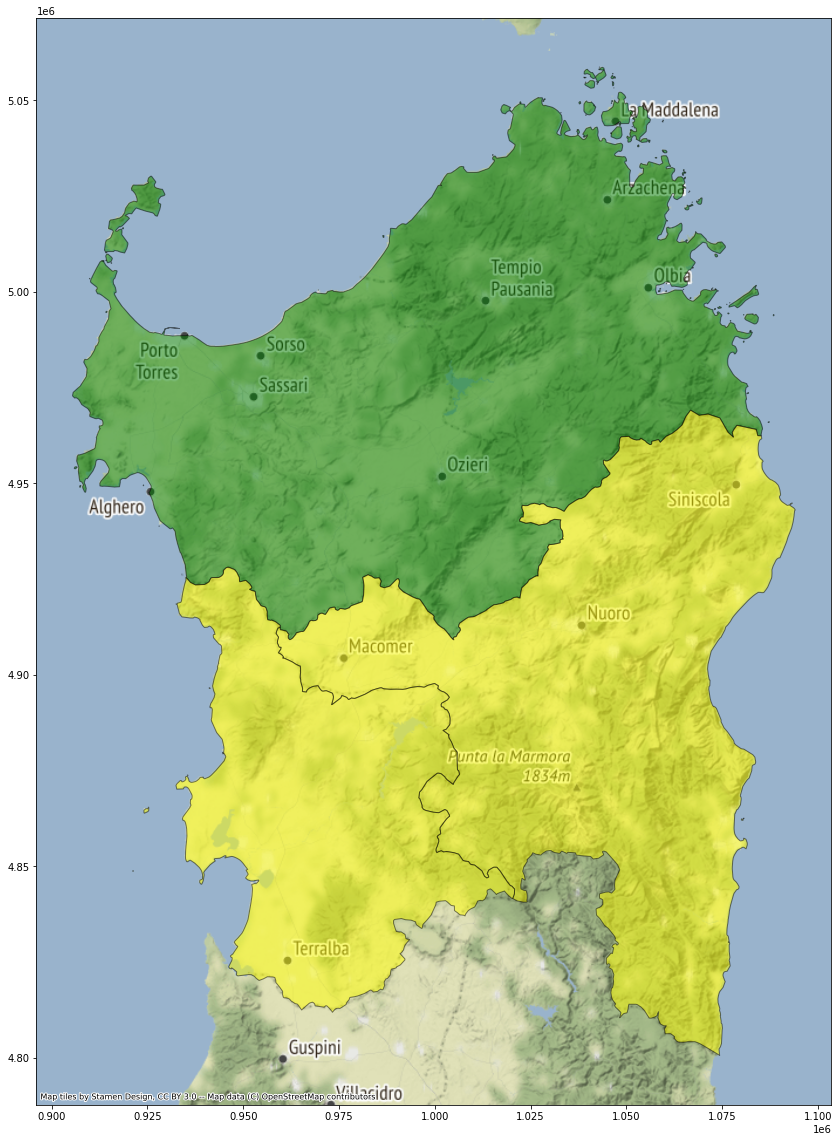

In [9]:
max = province[province.Shape_Area == province.Shape_Area.max()]
tocca = province[province.touches(max.geometry.squeeze())]
ax = max.to_crs(epsg=3857).plot(figsize =(20,20), facecolor = "green", edgecolor = "k", alpha = 0.5)
tocca.to_crs(epsg=3857).plot(ax=ax, facecolor = "yellow", edgecolor = "k", alpha = 0.5)
contextily.add_basemap(ax, crs=3857)

Estrarre dalle province le province lombarde. Utilizzare poi il dataset così ottenuto per visualizzare le
province attraversate da un corso d’acqua inserito dall’utente. Visualizzare infine le province e il corso
d’acqua su una mappa. Controllare che il nome del corso d’acqua sia presente nel dataset: in caso negativo
dare un messaggio di errore.

In [10]:
corsi_acqua = geopandas.read_file("/content/drive/MyDrive/Colab Notebooks/geopandas-tutorial-master/data/Corsi_acqua_Piano_di_Gestione.zip")
corsi_acqua.head(4)

OBJECTID  ...                                           geometry
0       188  ...  LINESTRING (480362.262 5040575.220, 480364.627...
1       191  ...  MULTILINESTRING ((494060.091 5029696.046, 4940...
2       215  ...  MULTILINESTRING ((536963.747 5005395.412, 5369...
3       252  ...  LINESTRING (509280.513 5047845.024, 509281.795...

[4 rows x 31 columns]

In [11]:
lombardia = regioni.loc[regioni.DEN_REG == "Lombardia"]
proLom = province[province.within(lombardia.geometry.squeeze())]
proLom

COD_RIP  ...                                           geometry
11         1  ...  POLYGON ((483071.566 5104606.092, 483258.471 5...
12         1  ...  MULTIPOLYGON (((498077.207 5089780.202, 497614...
13         1  ...  POLYGON ((595652.358 5163515.659, 596042.420 5...
14         1  ...  MULTIPOLYGON (((538136.289 5004372.814, 539162...
15         1  ...  POLYGON ((585288.233 5104483.085, 585414.669 5...
16         1  ...  POLYGON ((615296.024 5132340.876, 615374.024 5...
17         1  ...  MULTIPOLYGON (((485536.366 4985444.605, 485366...
18         1  ...  POLYGON ((542189.537 5037362.585, 542408.347 5...
19         1  ...  POLYGON ((630538.958 5031669.589, 632819.864 5...
96         1  ...  POLYGON ((532079.618 5104664.092, 533286.608 5...
97         1  ...  POLYGON ((534551.968 5035118.603, 534818.280 5...
103        1  ...  POLYGON ((519754.706 5065242.380, 520199.702 5...

[12 rows x 13 columns]

In [12]:
input_corsi = input("inserisci corso: ")
corso = corsi_acqua.loc[corsi_acqua.NOME == input_corsi]
prov_corso = proLom[proLom.intersects(corso.unary_union)]
prov_corso

inserisci corso: Lambro (Fiume)


COD_RIP  ...                                           geometry
14         1  ...  MULTIPOLYGON (((538136.289 5004372.814, 539162...
97         1  ...  POLYGON ((534551.968 5035118.603, 534818.280 5...
103        1  ...  POLYGON ((519754.706 5065242.380, 520199.702 5...

[3 rows x 13 columns]

inserisci corso: Lambro (Fiume)


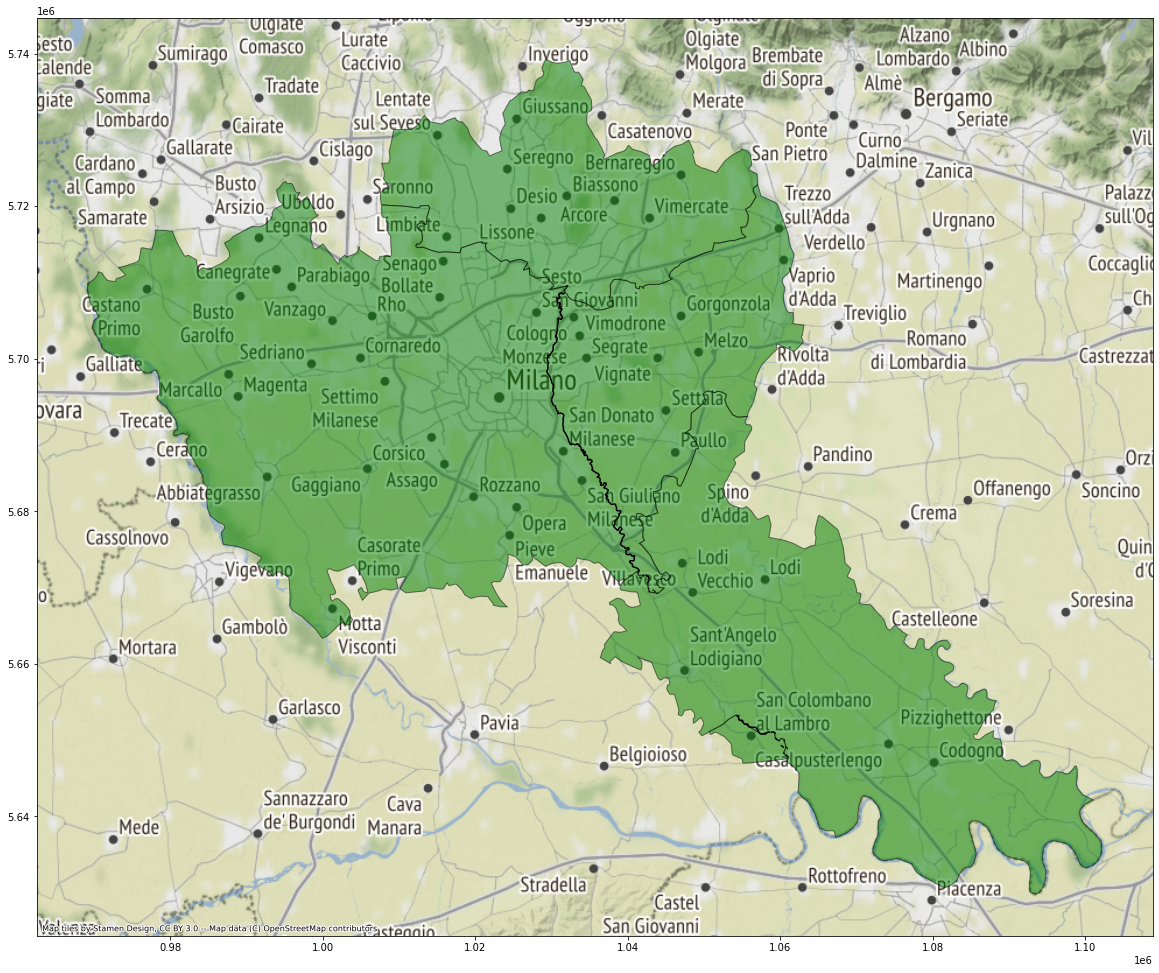

In [13]:
lombardia = regioni.loc[regioni.DEN_REG == "Lombardia"]
proLom = province[province.within(lombardia.geometry.squeeze())]
input_corsi = input("inserisci corso: ")
if input_corsi in list(corsi_acqua.NOME):
  corso = corsi_acqua.loc[corsi_acqua.NOME == input_corsi]
  prov_corso = proLom[proLom.intersects(corso.unary_union)]
  ax = prov_corso.to_crs(epsg=3857).plot(figsize =(20,20), facecolor = "green", edgecolor = "k", alpha = 0.5)
  corso.to_crs(epsg=3857).plot(ax=ax, color = "k")
  contextily.add_basemap(ax)
else:
  print("non esiste")